# Import libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load dataset

In [2]:
df = pd.read_csv('Language Detection.csv')
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


# Data cleaning


In [3]:
df.drop_duplicates(subset=["Text"], inplace=True)

# tokenize words
df['Text'] = df['Text'].apply(word_tokenize)

# remove punctuation
df['Text'] = df['Text'].apply(lambda text: ' '.join([word for word in text if word.isalpha()]))

# tokenize words
df['Text'] = df['Text'].apply(word_tokenize)

print(df['Text'])

0        [Nature, in, the, broadest, sense, is, the, na...
1        [Nature, can, refer, to, the, phenomena, of, t...
2        [The, study, of, nature, is, a, large, if, not...
3        [Although, humans, are, part, of, nature, huma...
4        [The, word, nature, is, borrowed, from, the, O...
                               ...                        
10332                                                  [ಆ]
10333                                                   []
10334                                              [ಈಗ, ಆ]
10335                                            [ಈಗ, ess]
10336                                                  [ಆ]
Name: Text, Length: 10267, dtype: object


# One Hot Encoding

In [4]:
bahasa = pd.get_dummies(df['Language'])
df_baru = pd.concat([df, bahasa], axis=1)
df_baru = df_baru.drop(columns=['Language'])
print(df_baru)

                                                    Text  Arabic  Danish  \
0      [Nature, in, the, broadest, sense, is, the, na...       0       0   
1      [Nature, can, refer, to, the, phenomena, of, t...       0       0   
2      [The, study, of, nature, is, a, large, if, not...       0       0   
3      [Although, humans, are, part, of, nature, huma...       0       0   
4      [The, word, nature, is, borrowed, from, the, O...       0       0   
...                                                  ...     ...     ...   
10332                                                [ಆ]       0       0   
10333                                                 []       0       0   
10334                                            [ಈಗ, ಆ]       0       0   
10335                                          [ಈಗ, ess]       0       0   
10336                                                [ಆ]       0       0   

       Dutch  English  French  German  Greek  Hindi  Italian  Kannada  \
0          0  

# Split dataset
in this dataset there is a column named text and 17 other columns with language names

In [5]:
kalimat = df_baru['Text'].values
label = df_baru[['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German', 'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
                 'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish']].values

# Split data into train and test

- random_state is used so that you will get the same result as i do

In [6]:
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2, random_state=42)

# Tokenization

In [7]:
vocab_size = 50000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih)

sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=70, padding='post')
padded_test = pad_sequences(sekuens_test, maxlen=70, padding='post')

print(f"Kalimat latih: {kalimat_latih} \n")
print(f"Sekuens latih: {sekuens_latih} \n")
print(f"Padded latih: {padded_latih} \n")

Kalimat latih: [list(['يمكن', 'للمحررين', 'في', 'إحدى', 'موسوعات', 'ويكيبيديا', 'أن', 'يترجموا', 'المقالات', 'من', 'لغة', 'إلى', 'لغة', 'وهذا', 'يلقى', 'في', 'مجتمع', 'ويكيبيديا', 'انظر', 'ويكيبيديا', 'ترجمة', 'مقالات', 'للعربية'])
 list([])
 list(['The', 'Earth', 'atmosphere', 'is', 'a', 'key', 'factor', 'in', 'sustaining', 'the', 'ecosystem'])
 ... list(['cubrirme'])
 list(['Due', 'to', 'its', 'generality', 'the', 'field', 'is', 'studied', 'in', 'many', 'other', 'disciplines', 'such', 'as', 'game', 'theory', 'control', 'theory', 'operations', 'research', 'information', 'theory', 'optimization', 'systems', 'swarm', 'intelligence', 'statistics', 'and', 'genetic', 'algorithms'])
 list(['Wikipedia', 'è', 'stata', 'elogiata', 'poiché', 'come', 'wiki', 'permette', 'alle', 'voci', 'di', 'essere', 'aggiornate', 'o', 'create', 'in', 'risposta', 'ad', 'avvenimenti', 'di', 'attualità'])] 

Sekuens latih: [[736, 3914, 49, 12120, 7407, 145, 111, 12121, 826, 67, 3183, 208, 3183, 2241, 12122, 49, 5

# Callback function

In [8]:
class SantaiDuluGakSih(tf.keras.callbacks.Callback):
  def __init__(self, sabar=5):
    super(SantaiDuluGakSih, self).__init__()
    self.sabar = sabar
    self.sabar_acc = 0
    self.sabar_loss = 0

  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9:
      self.sabar_acc += 1
    else:
      self.sabar_acc = 0

    """if logs.get('loss')>0.75 or logs.get('val_loss')>0.75:
      self.sabar_loss += 1
    else:
      self.sabar_loss = 0"""

    if self.sabar_acc >= self.sabar:
      print(f"The model accuracy has been above 90% for {self.sabar_acc} epochs, Stopping training immediatly!!!")
      self.model.stop_training = True
    elif self.sabar_loss >= self.sabar:
      print(f"The model loss has been above 75% for {self.sabar_loss} epochs, Stopping training immediatly!!!")
      self.model.stop_training = True

# Model creation

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=300, input_length=70),
    tf.keras.layers.LSTM(32),
    #tf.keras.layers.Dense(256, activation="relu"),
    #tf.keras.layers.Dense(128, activation="relu"),
    #tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(17, activation="softmax")
])

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
stop_early = SantaiDuluGakSih(sabar=10)
modelku = model.fit(
    padded_latih,
    label_latih,
    epochs=50,
    batch_size=8,
    validation_data=(padded_test, label_test),
    callbacks=[stop_early],
    verbose=2
)

Epoch 1/50
1027/1027 - 27s - loss: 2.7669 - accuracy: 0.1225 - val_loss: 2.7120 - val_accuracy: 0.1412 - 27s/epoch - 26ms/step
Epoch 2/50
1027/1027 - 11s - loss: 2.7367 - accuracy: 0.1325 - val_loss: 2.7062 - val_accuracy: 0.1412 - 11s/epoch - 10ms/step
Epoch 3/50
1027/1027 - 10s - loss: 2.7319 - accuracy: 0.1337 - val_loss: 2.7032 - val_accuracy: 0.1422 - 10s/epoch - 10ms/step
Epoch 4/50
1027/1027 - 10s - loss: 2.7231 - accuracy: 0.1364 - val_loss: 2.6963 - val_accuracy: 0.1441 - 10s/epoch - 10ms/step
Epoch 5/50
1027/1027 - 10s - loss: 2.7067 - accuracy: 0.1412 - val_loss: 2.6321 - val_accuracy: 0.1670 - 10s/epoch - 9ms/step
Epoch 6/50
1027/1027 - 10s - loss: 2.1619 - accuracy: 0.2897 - val_loss: 1.7423 - val_accuracy: 0.4167 - 10s/epoch - 9ms/step
Epoch 7/50
1027/1027 - 10s - loss: 1.7130 - accuracy: 0.4198 - val_loss: 1.5067 - val_accuracy: 0.4825 - 10s/epoch - 9ms/step
Epoch 8/50
1027/1027 - 9s - loss: 1.4868 - accuracy: 0.4911 - val_loss: 1.2089 - val_accuracy: 0.6027 - 9s/epoch -

# Prediction

### for debugging purposes


```
"i am not in danger skyler i am the danger, a guy open his door and get shot, you think that of me? no i am the one who knocks"
"non sono in pericolo Skyler, sono il pericolo, un ragazzo apre la porta e viene colpito, pensi questo di me? no, sono io quello che bussa"
"للعربيةللعربيةمقالاتترجمةويكيبيدياانظر"
print(input_text)
print(sekuens_input, "\n")
print(padded_input, "\n")
print(len(prediksi), index_prediksi, len(label_prediksi))
```



In [29]:
input_text = input("Input your text here: ")

sekuens_input = tokenizer.texts_to_sequences([input_text])
padded_input = pad_sequences(sekuens_input, maxlen=70, padding='post')

import numpy as np
prediksi = model.predict(padded_input)
index_prediksi = np.argmax(prediksi)
label_prediksi = ['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German', 'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
                 'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish']

hasil_prediksi = label_prediksi[index_prediksi]

print(f"The language of this text is {hasil_prediksi}")

Input your text here: non sono in pericolo Skyler, sono il pericolo, un ragazzo apre la porta e viene colpito, pensi questo di me? no, sono io quello che bussa
1/1 [==============================] - 0s 332ms/step
The language of this text is Italian


# Plot accuracy & loss

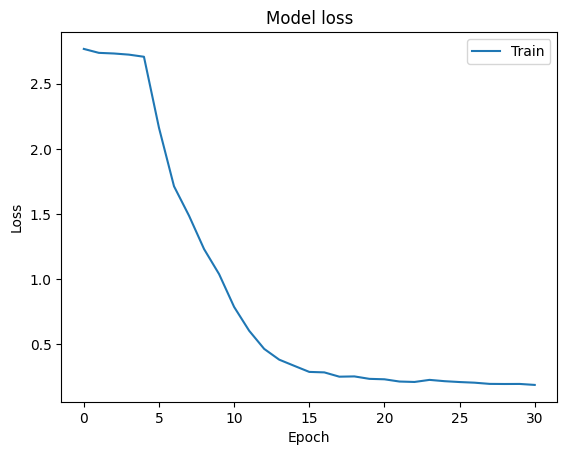

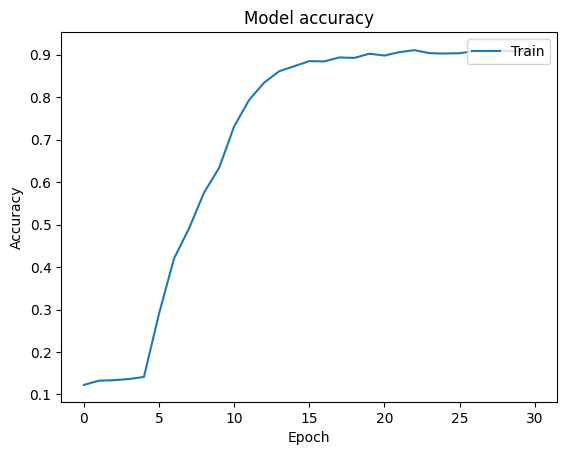

In [30]:
# plot loss
plt.plot(modelku.history['loss'])
plt.plot(modelku.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot acc
plt.plot(modelku.history['accuracy'])
plt.plot(modelku.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()